<a href="https://colab.research.google.com/github/Srinand2003/Development-of-classification-models-for-prostate-cancer-progression/blob/main/Genomics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Load dataset
file_path = "/content/Prostate_Cancer_Genomics.csv"  # Update this path
df = pd.read_csv(file_path)
df

<ipython-input-103-d7b931d1154c>:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,SYMBOL,GSE32448,GSE32448.1,GSE32448.2,GSE32448.3,GSE32448.4,GSE32448.5,GSE32448.6,GSE32448.7,GSE32448.8,...,GSE7307.10,GSE7307.11,GSE7307.12,GSE7307.13,GSE7307.14,GSE7307.15,GSE7307.16,GSE7307.17,GSE7307.18,GSE7307.19
0,SYMBOL,GSM802807_2,GSM802808_1,GSM802809_2,GSM802810_1,GSM802811_2,GSM802813_2,GSM802814_1,GSM802815_2,GSM802816_1,...,GSM175925_1,GSM175926_1,GSM175927_1,GSM175928_1,GSM175929_2,GSM175930_3,GSM175932_2,GSM175933_3,GSM175955_1,GSM176277_1
1,A1BG,1.552912143,2.161311949,2.000557388,2.112875371,1.753489125,2.160202379,1.871192048,1.932252533,2.685099252,...,3.232984223,3.231778333,3.328383231,3.529134849,4.220531391,4.013471445,3.867425972,3.480465504,3.518097753,4.829523949
2,A1BG-AS1,3.298463785,2.706664966,2.564801335,2.97097288,2.603391275,2.78533085,2.652223355,2.730011123,4.224451458,...,3.377736881,3.412364774,3.744418606,3.825010557,4.576479963,4.071617489,3.557843204,3.856151238,3.909876456,5.055799716
3,A1CF,2.364035184,2.363778356,2.120710236,2.582755733,1.930660727,1.849318042,2.247044726,1.874415581,2.995232953,...,3.584820551,3.525921529,3.907544009,3.986049028,4.654281969,4.365987761,3.961153473,4.426593152,4.329023681,5.271185664
4,A2M,3.376428644,7.32122341,5.352287264,5.20543972,2.727821809,7.951312284,8.025170976,4.375924131,7.606127173,...,8.955728854,8.628236472,8.953775506,8.971656466,10.95731003,9.661937067,11.72076566,10.02459857,9.129346457,10.6511552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20943,ZYG11A,2.478482,2.457954,2.470409,3.03894,2.328234,2.399015,3.885995,2.313432,3.127474,...,3.468894,3.639564,4.161698,4.356601,4.428639,4.194271,3.683299,4.173946,4.197009,5.179002
20944,ZYG11B,4.162502,5.355253,3.923741,3.920802,2.953934,2.378999,5.319614,1.979005,5.422925,...,3.538329,3.481472,3.826722,3.970578,4.218886,3.882159,3.149423,3.314267,3.776822,5.183813
20945,ZYX,1.981903,2.497533,2.472941,2.38795,2.304075,2.313432,2.508158,2.351077,2.918399,...,5.625074,5.808162,6.693725,6.37647,6.998088,6.950747,7.050391,6.978863,6.339593,7.505403
20946,ZZEF1,2.141494,2.188968,2.134947,2.754223,1.804354,2.14925,2.588551,2.128828,3.1757,...,3.771597,4.067012,4.064542,4.297982,5.002262,5.011549,4.374802,4.488612,4.612378,5.932264


In [ ]:
# Extract labels (Gillison Classification) from first row
labels_row = df.iloc[0, 1:].values  # Extracts classification labels
sample_labels = pd.DataFrame({'Sample': df.columns[1:], 'Gillison_Class': labels_row})

In [ ]:
# Reloading the dataset
import pandas as pd

# Load the dataset
file_path = "/content/Prostate_Cancer_Genomics.csv"
df = pd.read_csv(file_path)

# Extract labels (Gillison Classification) from the first row
labels_row = df.iloc[0, 1:].values  # Extract classification labels from the first row
sample_labels = pd.DataFrame({'Sample': df.columns[1:], 'Gillison_Class': labels_row})

# Process the classification labels (extract number after underscore '_')
sample_labels["Gillison_Class"] = sample_labels["Gillison_Class"].str.split("_").str[-1]
sample_labels["Gillison_Class"] = pd.to_numeric(sample_labels["Gillison_Class"], errors='coerce')

# Count distribution of Normal, Benign, and Tumor samples
class_distribution = sample_labels["Gillison_Class"].value_counts().sort_index()

# Rename the index for clarity
class_distribution.index = ["Normal (1)", "Benign (2)", "Tumor (3)"]

# Display the split-up
class_distribution


<ipython-input-105-cf1d568107c0>:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,count
Normal (1),57
Benign (2),45
Tumor (3),41


In [ ]:
#Remove the first row and reset index
df_cleaned = df.iloc[1:].reset_index(drop=True)

# Convert data columns to numeric
df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
#df_cleaned

# Extract classification labels (last character after "_")
sample_labels["Gillison_Class"] = sample_labels["Gillison_Class"].astype(str).str.split("_").str[-1] # Convert to string type before using .str
sample_labels["Gillison_Class"] = pd.to_numeric(sample_labels["Gillison_Class"], errors='coerce')

# Transpose dataset to match samples with labels
df_transposed = df_cleaned.set_index("SYMBOL").T.reset_index()
df_final = df_transposed.merge(sample_labels, left_on="index", right_on="Sample").drop(columns=["index", "Sample"])
#df_final

<ipython-input-107-70e377e2b861>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


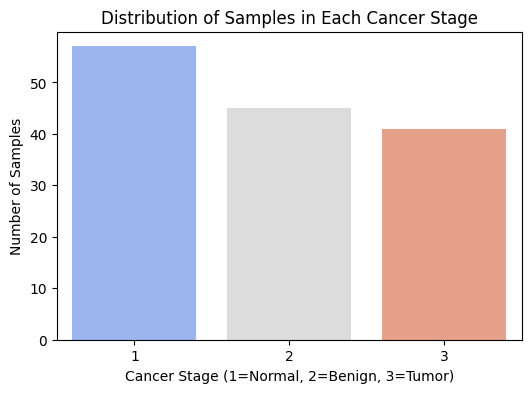

In [ ]:
# Count of each class
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df_final["Gillison_Class"].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Cancer Stage (1=Normal, 2=Benign, 3=Tumor)")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples in Each Cancer Stage")
plt.show()


In [ ]:
# Count the total number of GSM columns (excluding the first column "SYMBOL")
total_gsm_columns = df.shape[1] - 1  # Subtract 1 to exclude the "SYMBOL" column

# Count the total number of classified samples
total_classified_samples = sample_labels.shape[0]

# Display both counts
total_gsm_columns, total_classified_samples


(143, 143)

In [ ]:
# Remove the first row and reset index
df_cleaned = df.iloc[1:].reset_index(drop=True)

# Convert data columns to numeric
df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_cleaned



,SYMBOL,GSE32448,GSE32448.1,GSE32448.2,GSE32448.3,GSE32448.4,GSE32448.5,GSE32448.6,GSE32448.7,GSE32448.8,...,GSE7307.10,GSE7307.11,GSE7307.12,GSE7307.13,GSE7307.14,GSE7307.15,GSE7307.16,GSE7307.17,GSE7307.18,GSE7307.19
0,A1BG,1.552912,2.161312,2.000557,2.112875,1.753489,2.160202,1.871192,1.932253,2.685099,...,3.232984,3.231778,3.328383,3.529135,4.220531,4.013471,3.867426,3.480466,3.518098,4.829524
1,A1BG-AS1,3.298464,2.706665,2.564801,2.970973,2.603391,2.785331,2.652223,2.730011,4.224451,...,3.377737,3.412365,3.744419,3.825011,4.57648,4.071617,3.557843,3.856151,3.909876,5.0558
2,A1CF,2.364035,2.363778,2.12071,2.582756,1.930661,1.849318,2.247045,1.874416,2.995233,...,3.584821,3.525922,3.907544,3.986049,4.654282,4.365988,3.961153,4.426593,4.329024,5.271186
3,A2M,3.376429,7.321223,5.352287,5.20544,2.727822,7.951312,8.025171,4.375924,7.606127,...,8.955729,8.628236,8.953776,8.971656,10.95731,9.661937,11.720766,10.024599,9.129346,10.651155
4,A2M-AS1,1.88635,2.60952,2.819756,2.411728,2.106274,2.518125,2.809201,2.092527,3.201622,...,3.950553,3.803387,3.706637,3.974702,5.362629,4.456219,4.66259,3.935329,4.005961,5.462617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,ZYG11A,2.478482,2.457954,2.470409,3.03894,2.328234,2.399015,3.885995,2.313432,3.127474,...,3.468894,3.639564,4.161698,4.356601,4.428639,4.194271,3.683299,4.173946,4.197009,5.179002
20943,ZYG11B,4.162502,5.355253,3.923741,3.920802,2.953934,2.378999,5.319614,1.979005,5.422925,...,3.538329,3.481472,3.826722,3.970578,4.218886,3.882159,3.149423,3.314267,3.776822,5.183813
20944,ZYX,1.981903,2.497533,2.472941,2.38795,2.304075,2.313432,2.508158,2.351077,2.918399,...,5.625074,5.808162,6.693725,6.37647,6.998088,6.950747,7.050391,6.978863,6.339593,7.505403
20945,ZZEF1,2.141494,2.188968,2.134947,2.754223,1.804354,2.14925,2.588551,2.128828,3.1757,...,3.771597,4.067012,4.064542,4.297982,5.002262,5.011549,4.374802,4.488612,4.612378,5.932264


In [ ]:
# Extract classification labels (last character after "_")
sample_labels["Gillison_Class"] = sample_labels["Gillison_Class"].astype(str).str.split("_").str[-1] # Convert to string type before using .str
sample_labels["Gillison_Class"] = pd.to_numeric(sample_labels["Gillison_Class"], errors='coerce')

# Transpose dataset to match samples with labels
df_transposed = df_cleaned.set_index("SYMBOL").T.reset_index()
df_final = df_transposed.merge(sample_labels, left_on="index", right_on="Sample").drop(columns=["index", "Sample"])
df_final


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Gillison_Class
0,1.552912,3.298464,2.364035,3.376429,1.88635,2.133354,1.93065,3.341955,1.999598,2.73375,...,4.205092,2.384071,1.769076,3.977742,2.478482,4.162502,1.981903,2.141494,4.820435,2
1,2.161312,2.706665,2.363778,7.321223,2.60952,2.4202,1.995218,3.481441,2.36129,2.180615,...,3.297837,2.391432,2.728874,2.264315,2.457954,5.355253,2.497533,2.188968,4.861527,1
2,2.000557,2.564801,2.12071,5.352287,2.819756,1.706128,2.159304,3.418675,1.959875,2.101233,...,3.011678,1.968646,1.854828,1.983568,2.470409,3.923741,2.472941,2.134947,2.936834,2
3,2.112875,2.970973,2.582756,5.20544,2.411728,2.216681,2.64104,4.048631,2.158286,2.29186,...,3.535394,2.380532,2.621962,2.730912,3.03894,3.920802,2.38795,2.754223,2.794245,1
4,1.753489,2.603391,1.930661,2.727822,2.106274,1.796554,1.588093,3.214916,1.86053,1.996914,...,2.368117,1.9738,1.716433,2.338808,2.328234,2.953934,2.304075,1.804354,4.349701,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,4.013471,4.071617,4.365988,9.661937,4.456219,2.975754,3.974966,4.547604,3.803899,4.972239,...,5.504087,4.812641,5.116783,5.271276,4.194271,3.882159,6.950747,5.011549,6.638856,3
139,3.867426,3.557843,3.961153,11.720766,4.66259,2.528391,3.803749,4.144004,3.47688,4.297025,...,5.076282,3.78257,4.924317,4.992044,3.683299,3.149423,7.050391,4.374802,6.616309,2
140,3.480466,3.856151,4.426593,10.024599,3.935329,2.583963,3.749657,4.428005,3.873987,4.662008,...,5.301731,4.137779,5.03372,4.763002,4.173946,3.314267,6.978863,4.488612,6.455953,3
141,3.518098,3.909876,4.329024,9.129346,4.005961,2.506326,3.592715,4.168642,3.612392,4.51182,...,5.703089,4.316992,5.189882,5.120228,4.197009,3.776822,6.339593,4.612378,6.50915,1


In [ ]:
# Split features (X) and target (y)
X = df_final.drop(columns=["Gillison_Class"])
y = df_final["Gillison_Class"]

In [ ]:
# Feature Selection: Select top 1000 most relevant genes
X_cleaned = X.dropna()  # Drops rows with NaN values
y_cleaned = y.loc[X_cleaned.index]  # Keep only corresponding labels

selector = SelectKBest(score_func=f_classif, k=1000)
X_selected = selector.fit_transform(X_cleaned, y_cleaned)



selected_genes = X.columns[selector.get_support()]
df_selected = pd.DataFrame(X_selected, columns=selected_genes)
df_selected["Gillison_Class"] = y

df_selected


,ABCE1,ABCG1,ACACA,ACER3,ACSM1,ACTA2,ADAM9,ADAMTS1,ADARB2,ADCY2,...,ZNF614,ZNF615,ZNF710,ZNF711,ZNF750,ZNF827,ZSCAN16,ZSCAN2,ZWINT,Gillison_Class
0,2.73641,3.860956,5.789967,5.143392,2.690516,1.818562,4.315917,1.965543,2.211309,3.039856,...,2.540835,7.239218,1.838949,2.033665,2.466692,8.169981,6.881,2.714936,4.205092,2
1,3.28451,2.619248,6.052119,5.622621,2.131897,7.858785,2.805378,3.713814,2.363732,6.386572,...,2.225231,5.50881,2.320262,2.42669,3.76763,9.377109,3.963109,3.372424,3.297837,1
2,2.371306,4.789158,8.043288,2.24477,2.231832,2.878142,2.520821,1.882103,1.975936,2.693209,...,2.088118,5.562058,1.678349,1.788655,2.348527,7.81111,6.33465,3.836998,3.011678,2
3,2.190804,1.990042,6.053733,1.973202,2.591734,3.07743,2.257523,3.025592,2.807155,4.332429,...,2.169664,6.114113,2.529775,2.674097,2.120682,10.158648,3.26618,2.683932,3.535394,1
4,2.559547,2.449195,7.280094,7.414164,1.833777,2.647214,4.801937,2.187683,2.617615,2.893389,...,1.99732,8.520858,1.81816,1.912432,1.790404,7.665336,4.317318,3.378775,2.368117,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,6.75026,5.649071,5.023592,6.703051,5.184176,6.528938,6.737786,7.093598,3.900831,7.167093,...,6.342858,8.531007,6.826739,3.447138,3.557808,6.320115,4.232582,5.161704,5.504087,3
139,6.594257,4.213691,4.354692,7.280161,2.89807,5.70337,6.274144,4.168977,3.439081,6.539911,...,5.442555,7.934562,6.473296,5.372172,3.102671,4.884173,3.395264,4.233837,5.076282,2
140,6.366869,5.897002,5.140515,7.241888,6.668568,3.989256,6.051919,7.328826,3.746994,5.681257,...,4.379915,6.298535,6.57908,2.77796,2.928743,5.483201,3.702754,4.09863,5.301731,3
141,6.637898,4.791928,5.271471,7.143395,3.740441,6.13775,6.755337,6.807541,3.896545,6.471629,...,6.282091,8.420309,6.579009,3.905084,2.934133,6.09425,4.479581,4.568671,5.703089,1


In [ ]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns=["Gillison_Class"]),
                                                    df_selected["Gillison_Class"], test_size=0.2, random_state=42)


### RF Model

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
# Evaluate ML models
rf_acc = accuracy_score(y_test, rf_pred)

rf_report = classification_report(y_test, rf_pred)


print(f"Random Forest Accuracy: {rf_acc}\n", rf_report)


Random Forest Accuracy: 0.8620689655172413
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.89      0.80      0.84        10
           3       0.71      0.83      0.77         6

    accuracy                           0.86        29
   macro avg       0.84      0.85      0.84        29
weighted avg       0.87      0.86      0.86        29



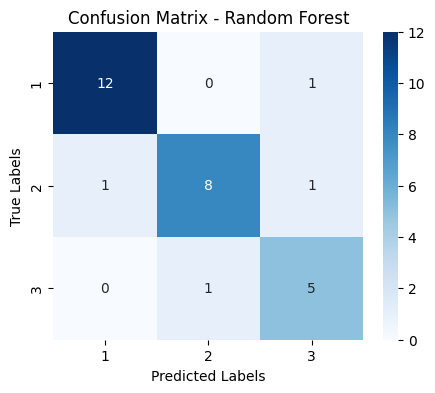

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Example Usage for RF
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

### ANN Model

In [ ]:
# Train ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    #Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: Normal, Benign, Tumor
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Split features (X) and target (y)
X = df_final.drop(columns=["Gillison_Class"])
y = df_final["Gillison_Class"]

# ... (rest of your code) ...

# Convert X_train and X_test to numeric before training the ANN model
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
# Subtract 1 from y_train and y_test to shift labels to 0, 1, 2
y_train = y_train - 1
y_test = y_test - 1


In [ ]:
# Compile ANN model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ANN
history = ann_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.3284 - loss: 2.7017 - val_accuracy: 0.4483 - val_loss: 1.7938
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3853 - loss: 1.6046 - val_accuracy: 0.2759 - val_loss: 1.0936
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4797 - loss: 1.0628 - val_accuracy: 0.4828 - val_loss: 1.0689
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4769 - loss: 1.2101 - val_accuracy: 0.5172 - val_loss: 1.1229
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4874 - loss: 1.2298 - val_accuracy: 0.5862 - val_loss: 1.0300
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5662 - loss: 1.0264 - val_accuracy: 0.5172 - val_loss: 0.9081
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5069 - loss: 0.9530 - val_accuracy: 0.5517 - val_loss: 0.9343
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6113 - loss: 0.8566 - val_accuracy: 0.5862 - val_loss:

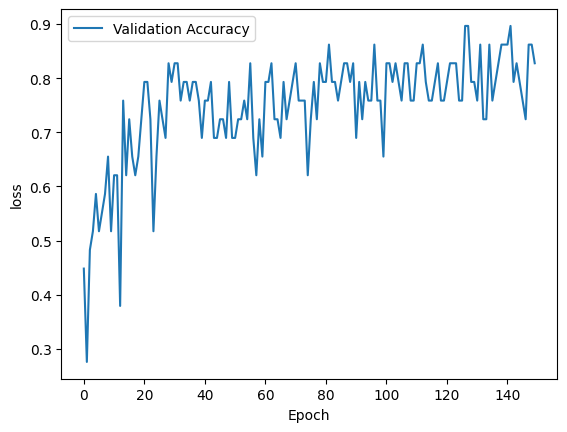

In [ ]:

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

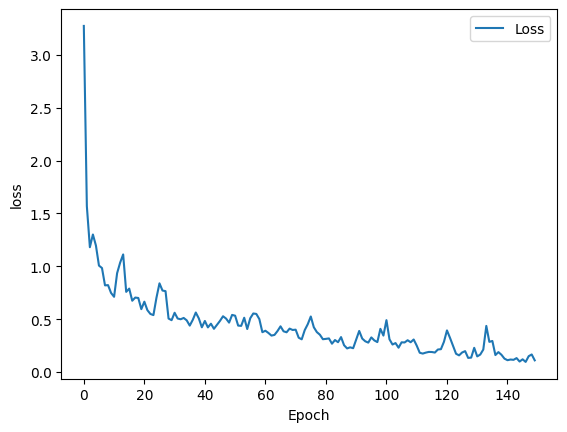

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

In [ ]:
# Evaluate ANN
ann_loss, ann_acc = ann_model.evaluate(X_test, y_test, verbose=0)
ann_pred = ann_model.predict(X_test)
ann_pred_classes = np.argmax(ann_pred, axis=1)  # Convert softmax outputs to class predictions
ann_report = classification_report(y_test, ann_pred_classes)
ann_acc = accuracy_score(y_test, ann_pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [ ]:
print(f"ANN Accuracy: {ann_acc}\n")
print("\nClassification Report - ANN:")
print(classification_report(y_test, ann_pred_classes, target_names=["Normal", "Benign", "Tumor"]))


ANN Accuracy: 0.8275862068965517


Classification Report - ANN:
              precision    recall  f1-score   support

      Normal       0.92      0.85      0.88        13
      Benign       0.75      0.90      0.82        10
       Tumor       0.80      0.67      0.73         6

    accuracy                           0.83        29
   macro avg       0.82      0.80      0.81        29
weighted avg       0.84      0.83      0.83        29



In [ ]:
from sklearn.metrics import confusion_matrix # Importing the missing confusion_matrix function
import matplotlib.pyplot as plt
import seaborn as sns

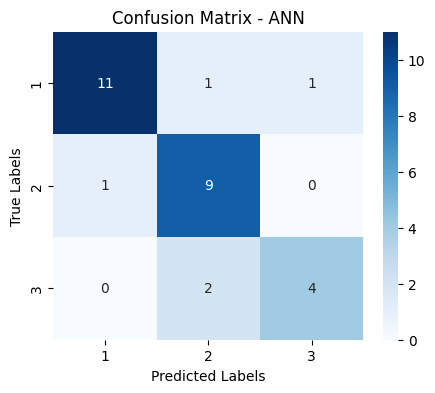

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Example Usage for RF

plot_confusion_matrix(y_test, ann_pred_classes, "ANN")

<ipython-input-124-15c982e46853>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


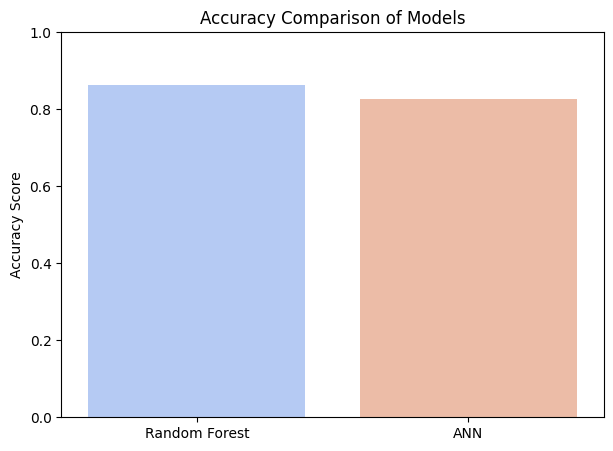

In [ ]:
# Plot Accuracy Comparison
models = ["Random Forest", "ANN"]
accuracies = [rf_acc,  ann_acc]

plt.figure(figsize=(7,5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison of Models")
plt.show()